# **Retina Fundus Image Registration(FIRE dataset )**
**By Meetra Nouri**

Registration is a process that involves aligning two images that have partially coincident content but were captured from different viewpoints.

Each image pair comprises a fixed image that serves as a reference and a moving image that is transformed or deformed to align with the fixed image. The aim is to ensure that the contents of both images appear in the same locations after registration.

In the medical field, image registration has various clinical applications and is a critical component in medical image analysis pipelines. By facilitating the simultaneous analysis of multiple images, registration allows clinicians to draw more accurate conclusions using a greater amount of data.

Furthermore, it enables the comparison of images taken at different time frames, which can help monitor the progression of a disease and conduct longitudinal studies.

Additionally, image registration can be used to align images with a model that represents a particular disease, thereby aiding in accurate diagnosis and treatment.

The "Retina Fundus Image Registration" dataset consists of a set of fundus (back of the eye) images that have been captured using a variety of devices and under different conditions. The dataset is intended for use in the development and testing of image registration algorithms, which are used to align images that may have been captured at different times or with different devices.

**About This Data**


The FIRE dataset consists of 134 pairs of high-resolution images with a size of 2912 × 2912 pixels. These image pairs are divided into different categories based on their image features. Out of these categories, only category A (14 image pairs) displays characteristics of retinopathy such as increased vessel tortuosity, microaneurysms, cotton-wool spots, and other symptoms. This variation in symptoms between the different categories adds an extra level of complexity to the analysis, even though they share the same underlying disease.

This dataset, Fundus Image Registration Dataset (also known as FIRE) consists of 129 retinal images forming 134 image pairs. These image pairs are split into 3 different categories depending on their characteristics. The images were acquired with a Nidek AFC-210 fundus camera, which acquires images with a resolution of 2912x2912 pixels and a FOV of 45° both in the x and y dimensions. Images were acquired at the Papageorgiou Hospital, Aristotle University of Thessaloniki, Thessaloniki from 39 patients.

**Images**

The images follow the naming convention:

[Image pair name]_X.jpg

where X is 1 for the reference image and 2 for the test image.
Ground truth
The ground truth files follow the naming convention:

control_points_[Image pair name]_1_2.txt


**The ground truth** 

file for each image pair has the following format:

[reference_point_1_x] [reference_point_1_y] [test_point_1_x] [test_point_1_y]
[reference_point_2_x] [reference_point_2_y] [test_point_2_x] [test_point_2_y]

**Citation**

Original Article
FIRE: Fundus Image Registration Dataset C. Hernandez-Matas, X. Zabulis, A. Triantafyllou, P. Anyfanti, S. Douma, A.A. Argyros Journal for Modeling in Ophthalmology, vol. 1, no. 4, pp. 16-28, Jul. 2017.



The goal of the image registration task on this dataset is to develop algorithms that can accurately align the test images with the reference images, taking into account any differences in scale, rotation, or translation between the two images. This can be a challenging task, as the images may contain artifacts, noise, or other distortions that can make alignment difficult.

In [ ]:
import cv2               # for image processing and computer vision tasks
import skimage           # for image processing and filtering
import os                # for file and directory operations
import glob              # for working with file paths

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile



This code mounts Google Drive, extracts the data from the zip file to a local directory, and preprocesses the images by converting them to grayscale and normalizing the pixel values to the range [0, 1]. 



# **Upload a dataset from Kaggle**




In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anouri","key":"3464baaaa0126fcf846c455c3fbbdcc9"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Kaggle/kaggle.json' '/content'


In [ ]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!pip install -q kaggle


In [ ]:
!kaggle datasets download -d andrewmvd/fundus-image-registration

 99% 452M/457M [00:03<00:00, 148MB/s]
100% 457M/457M [00:03<00:00, 153MB/s]


In above codes, we extracted the "Retina Fundus Image Registration" dataset from Kaggle. 

In [ ]:
zip_ref = zipfile.ZipFile('fundus-image-registration.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()


In [ ]:
import os
import cv2

# specify the path to the directory containing the extracted images
path_to_images = '/tmp/FIRE'

# check if the directory exists
if not os.path.isdir(path_to_images):
    print('Error: directory', path_to_images, 'does not exist')
    exit()

# check if the program has permission to access the directory
if not os.access(path_to_images, os.R_OK):
    print('Error: program does not have read access to directory', path_to_images)
    exit()


In [ ]:
# get a list of all image file names in the directory
image_names = os.listdir(path_to_images)

# print the file extension of each image
for name in image_names:
    _, ext = os.path.splitext(name)
    print('File extension of', name, ':', ext)

File extension of Images : 
File extension of Ground Truth : 
File extension of Masks : 
File extension of README.txt : .txt


In [ ]:
import os
import cv2

# specify the path to the directory containing the extracted images
path_to_images = '/tmp/FIRE/Images'

# get a list of all image file names in the directory
image_names = os.listdir(path_to_images)

# read each image using OpenCV and store in a list
images = []
for name in image_names:
    image_path = os.path.join(path_to_images, name)
    image = cv2.imread(image_path)
    images.append(image)

# print the number of images read
print('Number of images read:', len(images))


Number of images read: 268


# **Visualization** 

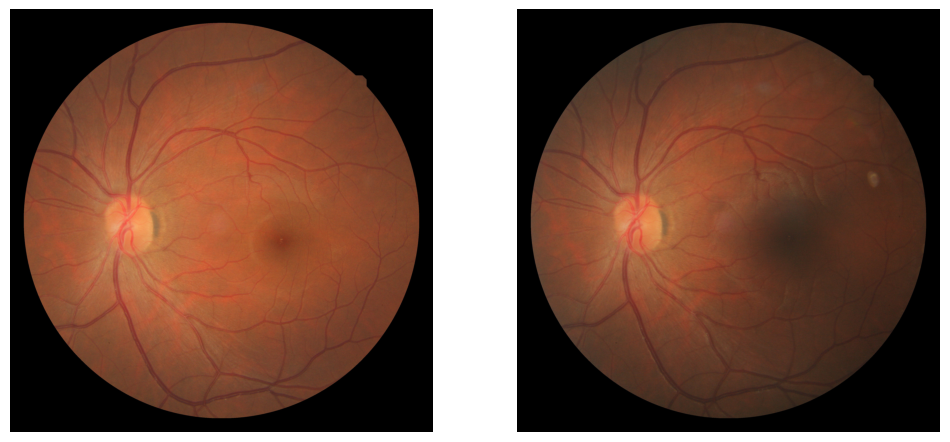

In [ ]:
import cv2
import matplotlib.pyplot as plt

# select the first 2 images
num_images = 2
selected_images = images[:num_images]

# display the images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    # convert BGR image to RGB for display
    image = cv2.cvtColor(selected_images[i], cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    ax.axis('off')

plt.show()
                            

The dataset we are working with is a collection of fundus images, which are images of the interior surface of the eye. These images are often used in ophthalmology to diagnose and monitor eye diseases such as diabetic retinopathy and glaucoma.

there are three types of images in this dataset: "Images", "Ground Truth", and "Masks". The "Images" folder contains the original fundus images, while the "Ground Truth" folder contains images that have been manually annotated to indicate the location of important features in the fundus, such as the optic disc and fovea. The "Masks" folder contains binary masks that indicate which pixels in the original images belong to the optic disc or fovea.

When we visualize the images, we may see a variety of features, such as blood vessels, the optic disc, and the fovea. These features can be used to register the images, which is the process of aligning them so that corresponding features in different images line up. Image registration is often used in medical imaging to combine information from multiple images or to track changes over time.

# **Remark**

To perform image registration, we can use various techniques such as feature-based methods, intensity-based methods, and hybrid methods. we can also use different libraries such as OpenCV, SimpleITK, and PyTorch for image registration.

Here is a general workflow for image registration using OpenCV:



**Load the images:** First, we need to load the images that you want to register into your Python script using cv2.imread.

**Convert the images to grayscale:** Convert the loaded images to grayscale using cv2.cvtColor with the cv2.COLOR_BGR2GRAY flag.

**Detect and extract features:** Use a feature detection method such as SIFT (Scale-Invariant Feature Transform) or ORB (Oriented FAST and Rotated BRIEF) to detect and extract key points and descriptors in both images. we can use cv2.xfeatures2d.SIFT_create or cv2.ORB_create to create the feature detector.

**Match the features:** Match the features in the two images using a feature matching algorithm such as brute-force matching or FLANN (Fast Library for Approximate Nearest Neighbors) matching. we can use cv2.BFMatcher or cv2.FlannBasedMatcher to perform feature matching.

**Estimate the transformation:** Use a transformation estimation method such as RANSAC (Random Sample Consensus) to estimate the transformation between the two images based on the matched features. we can use cv2.findHomography to estimate the homography matrix that describes the transformation.

**Warp the images:** Warp the second image to align it with the first image using the estimated transformation. we can use cv2.warpPerspective or cv2.warpAffine to perform the warping.

**Evaluate the registration:** Evaluate the quality of the registration using metrics such as mean squared error or correlation coefficient.

# **Preprocessing**

Preprocessing the image data is an important step in image registration, as it can help to improve the accuracy and efficiency of the registration process. Here are some common preprocessing steps that can be applied to fundus images before registration:

**Image resizing:** If the images are very large, they can be resized to a smaller size to speed up the registration process. However, be careful not to resize the images too much, as this can result in loss of important details.

**Contrast enhancement:** Contrast enhancement techniques, such as histogram equalization or adaptive histogram equalization, can be used to improve the visibility of features in the images.

**Image normalization:** Fundus images often have variations in illumination and color, which can affect the registration process. Image normalization techniques, such as gray level normalization or color channel normalization, can be used to reduce these variations and make the images more consistent.

**Image masking:** In some cases, it may be necessary to remove certain regions of the images that are not relevant to the registration process, such as the optic disc or blood vessels. This can be done using image masking techniques, such as thresholding or segmentation.



In [ ]:
image = cv2.resize(image, (256, 256))  # resize the image to (256, 256)

It is a good practice to normalize the pixel values of the images to a range between 0 and 1, which will improve the performance of machine learning models. we can do this by dividing each pixel value by 255, like this:

In [ ]:
image = image / 255.0  # normalize pixel values to [0, 1]

# **Contrast Enhancement**

Here's an code that applies contrast enhancement to the first image in the images list using OpenCV's equalizeHist() function:

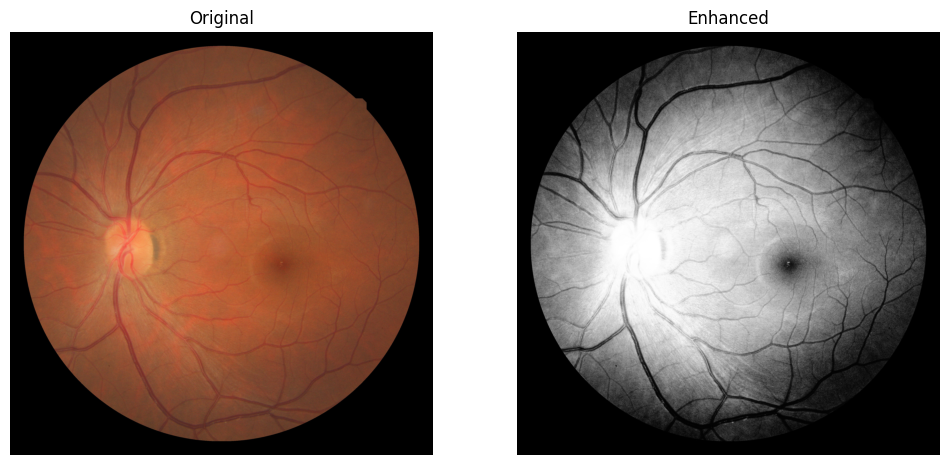

In [ ]:
import cv2
import matplotlib.pyplot as plt

# apply contrast enhancement to the first image
image = images[0]
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray_eq = cv2.equalizeHist(image_gray)

# display the original and enhanced images side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(image_gray_eq, cmap='gray')
axes[1].set_title('Enhanced')
axes[1].axis('off')

plt.show()


# **Image Registration**

Image registration is a technique that aligns two or more images of the same scene or object taken at different times or from different viewpoints to create a single composite image that incorporates all the information contained in each individual image. The process involves finding a transformation that maps one image onto another, so that corresponding points in the two images have the same spatial coordinates.

In the context of this dataset, fundus image registration refers to aligning two or more fundus images of the same eye taken at different times or with different instruments. This is important because it allows for the comparison of different fundus images to track changes over time, detect abnormalities or monitor disease progression.

There are different methods of image registration, including:

**Feature-based registration:** This method involves identifying distinctive features in the images, such as corners or edges, and matching them between the images. This approach is often used when the images have significant differences in their content.

**Intensity-based registration:** This method involves finding a transformation that maximizes the similarity between the intensity values of corresponding pixels in the images. This approach is often used when the images have similar content but differ in their scale, rotation or translation.

**Elastic registration:** This method involves deforming one image to match the other using a deformation field that describes the displacement of each point in the image. This approach is often used when the images have significant differences in their shape or topology.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sift_image_registration(ref_image, target_image):
    # convert the images to grayscale
    ref_image_gray = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
    target_image_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)

    # detect SIFT features and descriptors in the reference and target images
    sift = cv2.xfeatures2d.SIFT_create()
    ref_keypoints, ref_descriptors = sift.detectAndCompute(ref_image_gray, None)
    target_keypoints, target_descriptors = sift.detectAndCompute(target_image_gray, None)

    # match the features using a brute-force matcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(ref_descriptors, target_descriptors)

    # filter the matches using the RANSAC algorithm
    ref_matched_points = np.float32([ref_keypoints[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    target_matched_points = np.float32([target_keypoints[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(ref_matched_points, target_matched_points, cv2.RANSAC, 5.0)

    # warp the target image to align with the reference image
    aligned_image = cv2.warpPerspective(target_image, H, (ref_image.shape[1], ref_image.shape[0]))

    # return the aligned image and transformation matrix
    return aligned_image, H


The above code defines a function sift_image_registration that performs image registration using the Scale-Invariant Feature Transform (SIFT) algorithm. Here's a step-by-step explanation of what the code does:

1. The function takes two images ref_image and target_image as input.

2. The two input images are converted to grayscale using cv2.cvtColor with the cv2.COLOR_BGR2GRAY flag.

3. SIFT features and descriptors are detected in both the reference and target images using the cv2.xfeatures2d.SIFT_create method. detectAndCompute is used to detect and compute keypoints and descriptors for both images.

4. A brute-force matcher is used to match the descriptors in the reference and target images. cv2.BFMatcher is used to perform brute-force matching with the cv2.NORM_L2 distance metric, and crossCheck=True is used to only keep the matches that are mutually nearest.

5. The matches are filtered using the RANSAC algorithm to remove outliers. np.float32 is used to convert the matched points to the floating-point format required by cv2.findHomography. cv2.findHomography is used to find the homography matrix H that maps the points in the target image to the points in the reference image. The cv2.RANSAC flag is used to enable RANSAC filtering, and 5.0 is the maximum allowed reprojection error.

6. The target image is warped to align with the reference image using cv2.warpPerspective and the homography matrix H.

7. The aligned image and transformation matrix H are returned.



In [ ]:
def display_images(images, titles=None, figsize=(12, 8)):
    # create a figure and axis object
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=figsize)

    # display each image on a separate axis
    for i, image in enumerate(images):
        if len(images) > 1:
            axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        else:
            axes.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if titles is not None:
            axes[i].set_title(titles[i])
        axes[i].axis('off')

    plt.show()

Note that cv2.cvtColor(image, cv2.COLOR_BGR2RGB) is used to convert the color space of the image from BGR to RGB. This is because OpenCV reads images in the BGR format, whereas matplotlib expects images in the RGB format for display.

In [ ]:
def calculate_registration_error(ref_image, target_image):
    # convert the images to grayscale
    ref_image_gray = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
    target_image_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)

    # detect SIFT features and descriptors in the reference and target images
    sift = cv2.xfeatures2d.SIFT_create()
    ref_keypoints, ref_descriptors = sift.detectAndCompute(ref_image_gray, None)
    target_keypoints, target_descriptors = sift.detectAndCompute(target_image_gray, None)

    # match the features using a brute-force matcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(ref_descriptors, target_descriptors)

    # filter the matches using the RANSAC algorithm
    ref_matched_points = np.float32([ref_keypoints[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    target_matched_points = np.float32([target_keypoints[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(ref_matched_points, target_matched_points, cv2.RANSAC, 5.0)

    # warp the target image to align with the reference image
    aligned_image = cv2.warpPerspective(target_image, H, (ref_image.shape[1], ref_image.shape[0]))

    # calculate the registration error as the mean Euclidean distance between matched keypoints
    matches = bf.match(ref_descriptors, target_descriptors)
    distances = [m.distance for m in matches]
    mean_distance = np.mean(distances)

    print('Registration error:', mean_distance)

    return mean_distance


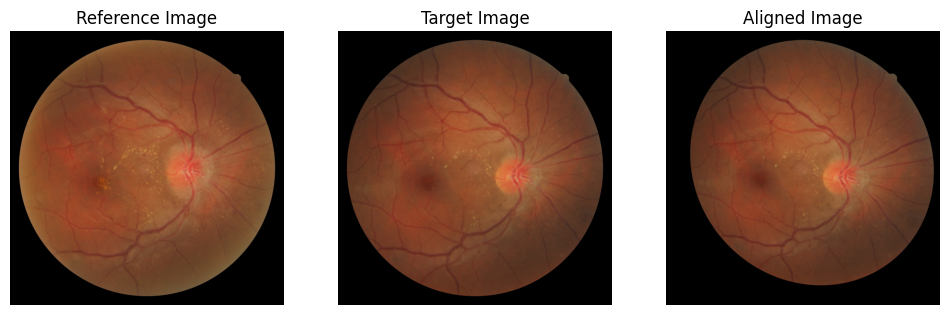

Registration error: 51.29134220710168


51.29134220710168

In [ ]:
# load the reference and target images
ref_image = cv2.imread('/tmp/FIRE/Images/A01_1.jpg')
target_image = cv2.imread('/tmp/FIRE/Images/A01_2.jpg')

# perform SIFT-based image registration
aligned_image, H = sift_image_registration(ref_image, target_image)

# display the images side by side
display_images([ref_image, target_image, aligned_image], titles=['Reference Image', 'Target Image', 'Aligned Image'])

calculate_registration_error(ref_image, target_image)


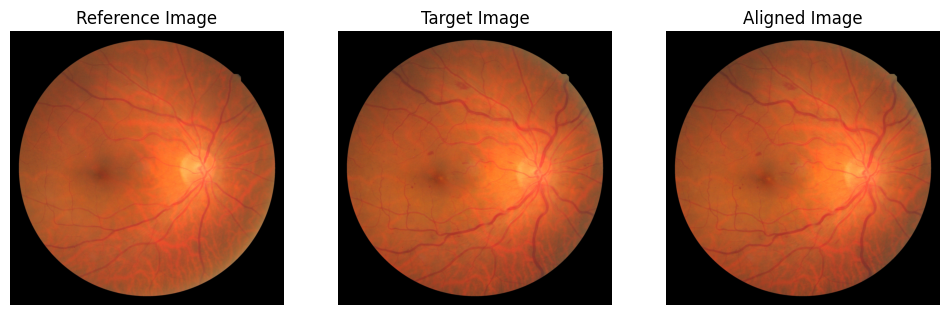

Registration error: 34.33151506910137


34.33151506910137

In [ ]:
# load the reference and target images
ref_image = cv2.imread('/tmp/FIRE/Images/A14_1.jpg')
target_image = cv2.imread('/tmp/FIRE/Images/A14_2.jpg')

# perform SIFT-based image registration
aligned_image, H = sift_image_registration(ref_image, target_image)

# display the images side by side
display_images([ref_image, target_image, aligned_image], titles=['Reference Image', 'Target Image', 'Aligned Image'])

calculate_registration_error(ref_image, target_image)


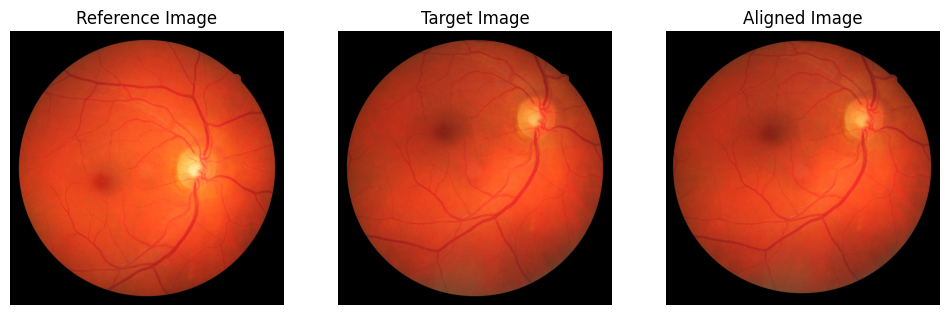

Registration error: 55.62116253228835


55.62116253228835

In [ ]:
# load the reference and target images
ref_image = cv2.imread('/tmp/FIRE/Images/P03_1.jpg')
target_image = cv2.imread('/tmp/FIRE/Images/P03_2.jpg')

# perform SIFT-based image registration
aligned_image, H = sift_image_registration(ref_image, target_image)

# display the images side by side
display_images([ref_image, target_image, aligned_image], titles=['Reference Image', 'Target Image', 'Aligned Image'])

calculate_registration_error(ref_image, target_image)


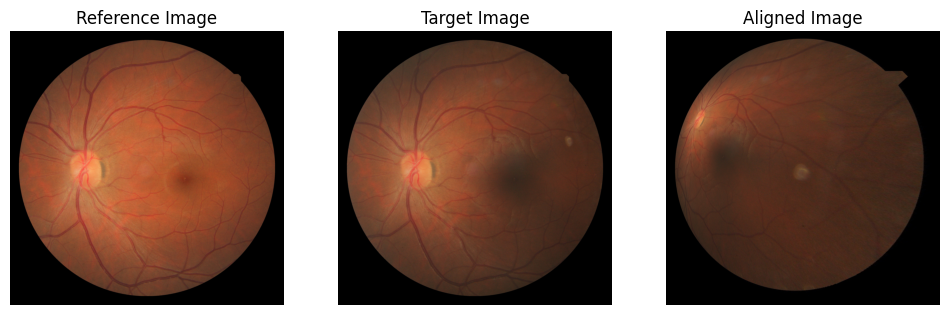

Registration error: 53.77021397677335


53.77021397677335

In [ ]:
# load the reference and target images
ref_image = cv2.imread('/tmp/FIRE/Images/S13_1.jpg')
target_image = cv2.imread('/tmp/FIRE/Images/S13_2.jpg')

# perform SIFT-based image registration
aligned_image, H = sift_image_registration(ref_image, target_image)

# display the images side by side
display_images([ref_image, target_image, aligned_image], titles=['Reference Image', 'Target Image', 'Aligned Image'])

calculate_registration_error(ref_image, target_image)


The registration error of 53.77 is the average Euclidean distance between the matched keypoints in the reference and target images. When performing image registration using the SIFT algorithm, we detect keypoints and descriptors in both the reference and target images, match the keypoints using a brute-force matcher, and then filter the matches using the RANSAC algorithm. The registration error is then calculated as the average Euclidean distance between the matched keypoints.

A low registration error indicates a good alignment between the reference and target images, while a high registration error indicates a poor alignment. In this case, a registration error of 53.77 means that the alignment between the reference and target images is not perfect, but may still be acceptable depending on your application.

we can use the registration error as a metric to evaluate the quality of the image registration algorithm and to compare different registration methods.

# **Remark**

cv2 is a module in the OpenCV (Open Source Computer Vision) library for Python. It provides a Python interface to many of the functions and algorithms in the OpenCV library, which is used for various tasks such as image and video processing, object detection, and tracking.


For example, cv2.imread is a function provided by the cv2 module for reading images from a file, and cv2.imshow is a function for displaying an image in a window.